### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Scraped Data

In [2]:
g_movies = pd.read_csv('g_movies_data.csv')
pg_movies = pd.read_csv('pg_movies_data.csv')
pg13_movies = pd.read_csv('pg13_movies_data.csv')
r_movies = pd.read_csv('r_movies_data.csv')
nc17_movies = pd.read_csv('nc17_movies_data.csv')

In [3]:
# combine scraped data into one df
all_movies = pd.concat([g_movies, pg_movies, pg13_movies, r_movies, nc17_movies], ignore_index = True)

### EDA

In [4]:
all_movies.columns

Index(['Unnamed: 0', 'link_stub', 'title', 'mpaa_rank', 'lifetime_gross',
       'overall_rank', 'year', 'domestic_distributor', 'domestic_opening',
       'budget', 'earliest_release_date', 'MPAA', 'run_time', 'genres'],
      dtype='object')

In [5]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3374 non-null   object 
 1   link_stub              3374 non-null   object 
 2   title                  3374 non-null   object 
 3   mpaa_rank              3374 non-null   object 
 4   lifetime_gross         3374 non-null   int64  
 5   overall_rank           3374 non-null   object 
 6   year                   3374 non-null   int64  
 7   domestic_distributor   3372 non-null   object 
 8   domestic_opening       3163 non-null   float64
 9   budget                 1917 non-null   float64
 10  earliest_release_date  3374 non-null   object 
 11  MPAA                   3374 non-null   object 
 12  run_time               3355 non-null   object 
 13  genres                 3374 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 369.2+

In [6]:
# we don't need columns, 'Unnamed: 0', 'link_stub' so we drop those
all_movies.drop(['Unnamed: 0', 'link_stub'], axis = 1, inplace = True)

In [7]:
# deal with missing data
# we drop 'budget' since a lot of budgets have gone unreported, eg. older movies that
# have unreported budgets
all_movies.drop(['budget'], axis = 1, inplace = True)

In [8]:
# also drop na
all_movies.dropna(axis = 0, inplace = True)

In [9]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3373
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3144 non-null   object 
 1   mpaa_rank              3144 non-null   object 
 2   lifetime_gross         3144 non-null   int64  
 3   overall_rank           3144 non-null   object 
 4   year                   3144 non-null   int64  
 5   domestic_distributor   3144 non-null   object 
 6   domestic_opening       3144 non-null   float64
 7   earliest_release_date  3144 non-null   object 
 8   MPAA                   3144 non-null   object 
 9   run_time               3144 non-null   object 
 10  genres                 3144 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 294.8+ KB


### Data Wrangling

In [10]:
# convert run time to minutes
def min_conv(run_time):
    if len(run_time.split()) == 4:
        minutes = int(run_time.split()[0]) * 60 + int(run_time.split()[2])
    elif len(run_time.split()) == 2 and run_time.split()[-1] == 'min':
        minutes = int(run_time.split()[0])
    elif len(run_time.split()) == 2 and run_time.split()[-1] == 'hr':
        minutes = int(run_time.split()[0]) * 60
    return minutes

all_movies['run_time'] = all_movies['run_time'].apply(min_conv)

In [11]:
# change dtype of overall_rank to int
# overall_rank represents the movie's lifetime gross earnings amongst all movies regardless of rank
all_movies['overall_rank'] = all_movies['overall_rank'].str.replace(',', '').astype('int')

In [12]:
# change dtype of mpaa_rank to int
# mpaa_rank represents the movie's lifetime gross earnings compared against movies with the same ratings
all_movies['mpaa_rank'] = all_movies['mpaa_rank'].str.replace(',', '').astype('float')

In [13]:
# change dtype of domestic_opening from float to int
all_movies['domestic_opening'] = all_movies['domestic_opening'].astype('int')

In [14]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3373
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3144 non-null   object 
 1   mpaa_rank              2847 non-null   float64
 2   lifetime_gross         3144 non-null   int64  
 3   overall_rank           3144 non-null   int64  
 4   year                   3144 non-null   int64  
 5   domestic_distributor   3144 non-null   object 
 6   domestic_opening       3144 non-null   int64  
 7   earliest_release_date  3144 non-null   object 
 8   MPAA                   3144 non-null   object 
 9   run_time               3144 non-null   int64  
 10  genres                 3144 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 294.8+ KB


### Base Model Regression

In [15]:
# create new df with only variables that is used to predict lifetime gross earnings
all_movies_num = pd.DataFrame(all_movies, columns = ['overall_rank',
                                                 'lifetime_gross',
                                                 'domestic_opening', 
                                                 'year',
                                                 'run_time'])

In [16]:
all_movies_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3373
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   overall_rank      3144 non-null   int64
 1   lifetime_gross    3144 non-null   int64
 2   domestic_opening  3144 non-null   int64
 3   year              3144 non-null   int64
 4   run_time          3144 non-null   int64
dtypes: int64(5)
memory usage: 147.4 KB


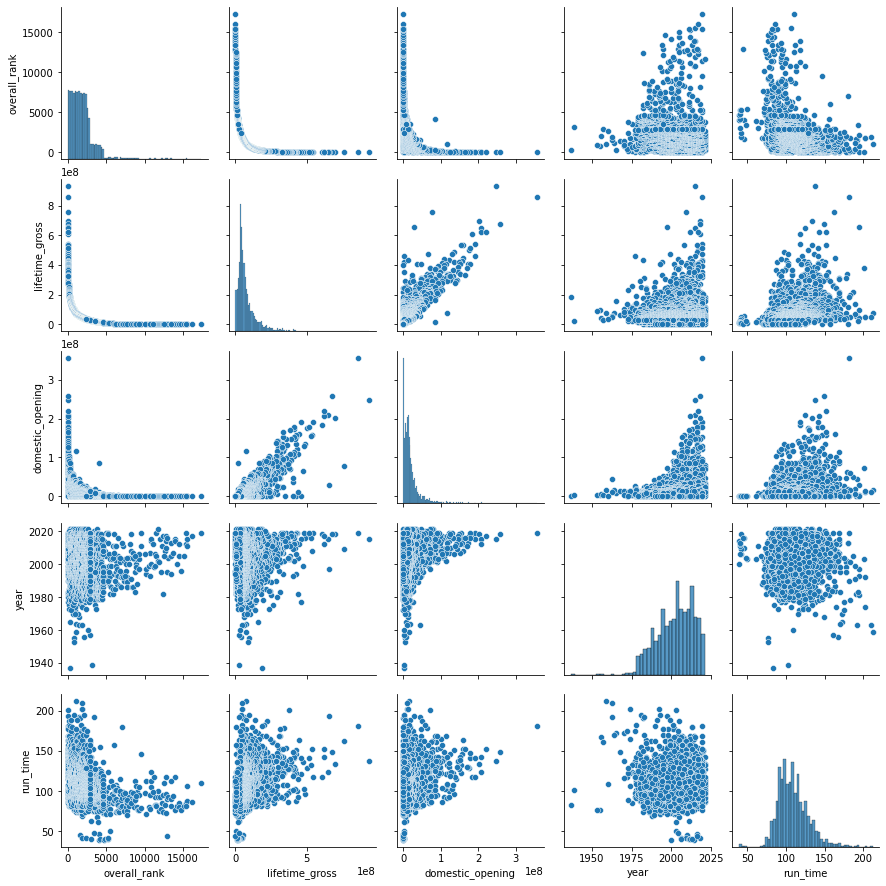

In [17]:
# create pair plot to which variables have highest correlation with lifetime gross earnings
sns.pairplot(all_movies_num[['overall_rank',
                        'lifetime_gross',
                        'domestic_opening',
                        'year',
                        'run_time']])

<AxesSubplot:>

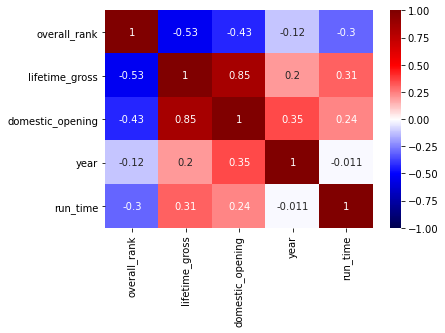

In [18]:
# create heat map to see which numeric variables have highest correlation with lifetime gross earnings
sns.heatmap(all_movies_num[['overall_rank',
                        'lifetime_gross',
                        'domestic_opening',
                        'year',
                        'run_time'
                       ]].corr(), cmap = 'seismic', annot = True, vmin =-1, vmax = 1)

# it seems that domestic opening has high correlation with lifetime gross earnings
# hype behind a movie can maybe explain this

In [19]:
# import packages
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
# pick variables that have high correlations with lifetime_gross
X = all_movies_num[['domestic_opening', 'run_time']]
y = all_movies_num[['lifetime_gross']]

# get test data, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, train_size = .80, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2515, 2)
(629, 2)
(2515, 1)
(629, 1)


In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[[2.63209504e+00 4.50492223e+05]]
[-23049427.87864029]


In [22]:
# get r squared evaluation metric
print(f'R^2 on training set is {lm.score(X_train, y_train)}')
print(f'R^2 on testing set is {lm.score(X_test, y_test)}')

R^2 on training set is 0.7323423948303421
R^2 on testing set is 0.7047056317049187


In [23]:
# k fold cross validation for base model
from sklearn.model_selection import cross_val_score, KFold

X = all_movies[['domestic_opening', 'run_time']]
y = all_movies[['lifetime_gross']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, train_size = .80, random_state = 42)

kfold = KFold(n_splits = 5, shuffle=True)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(np.mean(cross_val_score(lm, X, y, cv = kfold)))

0.7182884296818972


In [24]:
import statsmodels.api as sm
X = sm.add_constant(X)
stats_lm = sm.OLS(y, X, data = all_movies)
results = stats_lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifetime_gross   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     4183.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:02:34   Log-Likelihood:                -59679.
No. Observations:                3144   AIC:                         1.194e+05
Df Residuals:                    3141   BIC:                         1.194e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.369e+07   4.22e+06     -5.608      0.000    -3.2e+07   -1.54e+07
domestic_opening     2.6148      0.031     85.294      0.000       2.555       2.675
run_time          4.625e+05    3.9e+04     11.872      0.000    3.86e+05    5.39e+05
==============================================================================
Omnibus:                     2606.149   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117054.575
Skew:                           3.644   Prob(JB):                         0.00
Kurtosis:                      31.990   Cond. No.                     1.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature Engineering With Genres

In [25]:
# seems that the most popular genres are comedy, thriller, action and drama
# we will simplify movies into a single genre by creating dummies

# create comedy dummy
def comedy(series):
    for movie in series:
        if 'Comedy' in series:
            return 1
        else:
            return 0
all_movies['comedy'] = all_movies['genres'].apply(comedy)

# create thriller dummy
def thriller(series):
    for movie in series:
        if 'Thriller' in series:
            return 1
        else:
            return 0
all_movies['thriller'] = all_movies['genres'].apply(thriller)

# create action dummy
def action(series):
    for movie in series:
        if 'Action' in series:
            return 1
        else:
            return 0
all_movies['action'] = all_movies['genres'].apply(action)

# create drama dummy
def drama(series):
    for movie in series:
        if 'Drama' in series:
            return 1
        else:
            return 0
all_movies['drama'] = all_movies['genres'].apply(drama)

In [26]:
# deal with genres
all_movies['genres'].value_counts(normalize = True).head(50)

['Comedy']                                                   0.038804
['Comedy', 'Drama', 'Romance']                               0.034987
['Comedy', 'Romance']                                        0.034669
['Comedy', 'Drama']                                          0.023855
['Action', 'Adventure', 'Sci-Fi']                            0.022583
['Drama']                                                    0.018766
['Drama', 'Romance']                                         0.018766
['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']    0.015903
['Action', 'Adventure', 'Thriller']                          0.015585
['Action', 'Crime', 'Thriller']                              0.014631
['Horror', 'Mystery', 'Thriller']                            0.013041
['Action', 'Crime', 'Drama', 'Thriller']                     0.012723
['Crime', 'Drama', 'Thriller']                               0.012723
['Comedy', 'Crime']                                          0.011768
['Comedy', 'Family']

In [27]:
# create new df with only categorical variables that is used to predict lifetime gross earnings
all_movies_dum = (all_movies[['comedy',
                             'thriller',
                             'action',
                             'drama',
                             'lifetime_gross']])

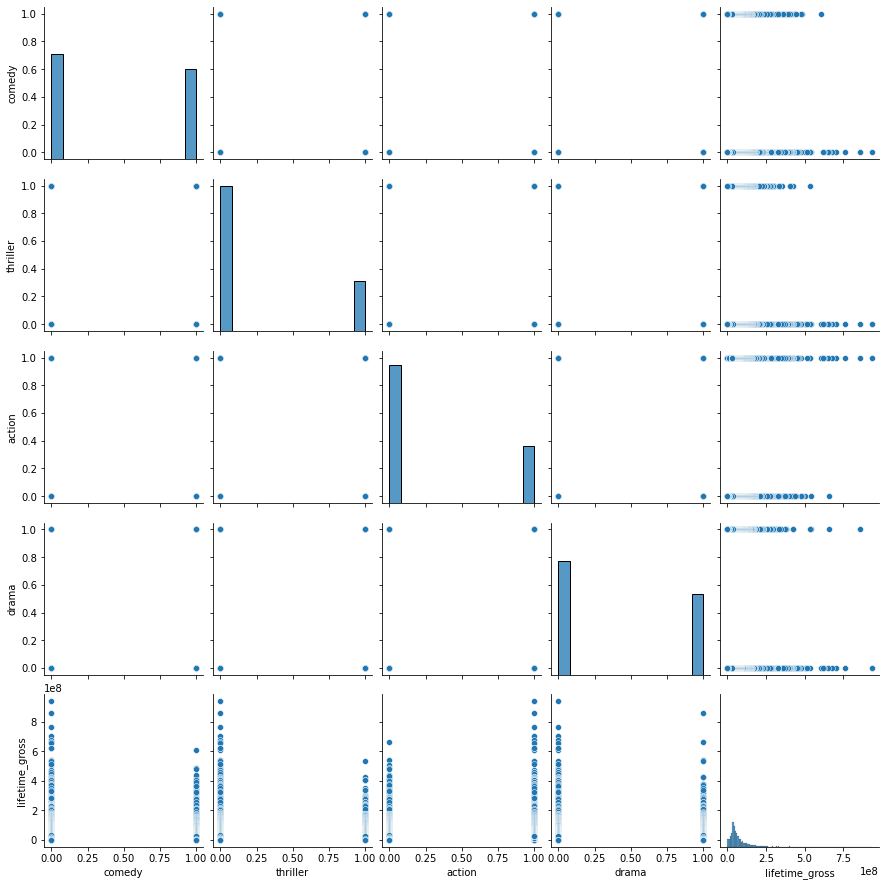

In [28]:
sns.pairplot(all_movies_dum)

<AxesSubplot:>

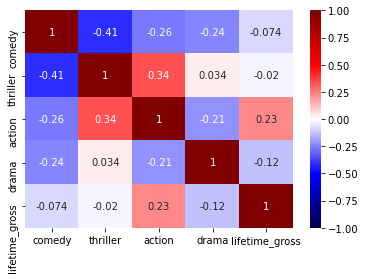

In [29]:
sns.heatmap(all_movies[['comedy',
                        'thriller',
                        'action',
                        'drama',
                        'lifetime_gross']].corr(), cmap= 'seismic', annot = True, vmin =- 1, vmax = 1)

# looks like action might be a feature we want to add to improve our model

In [30]:
X = all_movies[['domestic_opening', 'run_time', 'action']]
y = all_movies[['lifetime_gross']]

# get test data, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, train_size = .80, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2515, 3)
(629, 3)
(2515, 1)
(629, 1)


In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[[ 2.66052205e+00  4.66106361e+05 -6.02423144e+06]]
[-23544971.4236057]


In [32]:
# get r squared evaluation metric
print(f'R^2 on training set is {lm.score(X_train, y_train)}')
print(f'R^2 on the testing set is {lm.score(X_test, y_test)}')

# scores improved

R^2 on training set is 0.7333688501913158
R^2 on the testing set is 0.7053685978789059


### Feature Engineering With Release Season

In [33]:
# add a new column in df that shows us movie release season, eg. spring, summer, fall, winter
# convert earliest release date to season
def season_con(earliest_release_date):
    if 'Mar' in earliest_release_date:
        return 'Spring'
    elif 'Apr' in earliest_release_date:
        return 'Spring'
    elif 'May' in earliest_release_date:
        return 'Spring'
    elif 'Jun' in earliest_release_date:
        return 'Summer'
    elif 'Jul' in earliest_release_date:
        return 'Summer'
    elif 'Aug' in earliest_release_date:
        return 'Summer'
    elif 'Sep' in earliest_release_date:
        return 'Fall'
    elif 'Oct' in earliest_release_date:
        return 'Fall'
    elif 'Nov' in earliest_release_date:
        return 'Fall'
    else:
        return 'Winter'
    
all_movies['release_season'] = all_movies['earliest_release_date'].apply(season_con)

In [34]:
# try feature engineering on season
all_movies['release_season'].value_counts(normalize = True).head(50)

Summer    0.287850
Winter    0.242684
Fall      0.236005
Spring    0.233461
Name: release_season, dtype: float64

In [35]:
# create summer dummy
def summer(series):
    if 'Summer' in series:
        return 1
    else:
        return 0
all_movies['summer'] = all_movies['release_season'].apply(summer)

# create winter dummy
def winter(series):
    if 'Winter' in series:
        return 1
    else:
        return 0
all_movies['winter'] = all_movies['release_season'].apply(winter)

# create fall dummy
def fall(series):
    if 'Fall' in series:
        return 1
    else:
        return 0
all_movies['fall'] = all_movies['release_season'].apply(fall)

# create spring dummy
def spring(series):
    if 'Spring' in series:
        return 1
    else:
        return 0
all_movies['spring'] = all_movies['release_season'].apply(spring)

In [36]:
all_movies_sea = (all_movies[['summer',
                             'winter',
                             'spring',
                             'fall',
                             'lifetime_gross']])

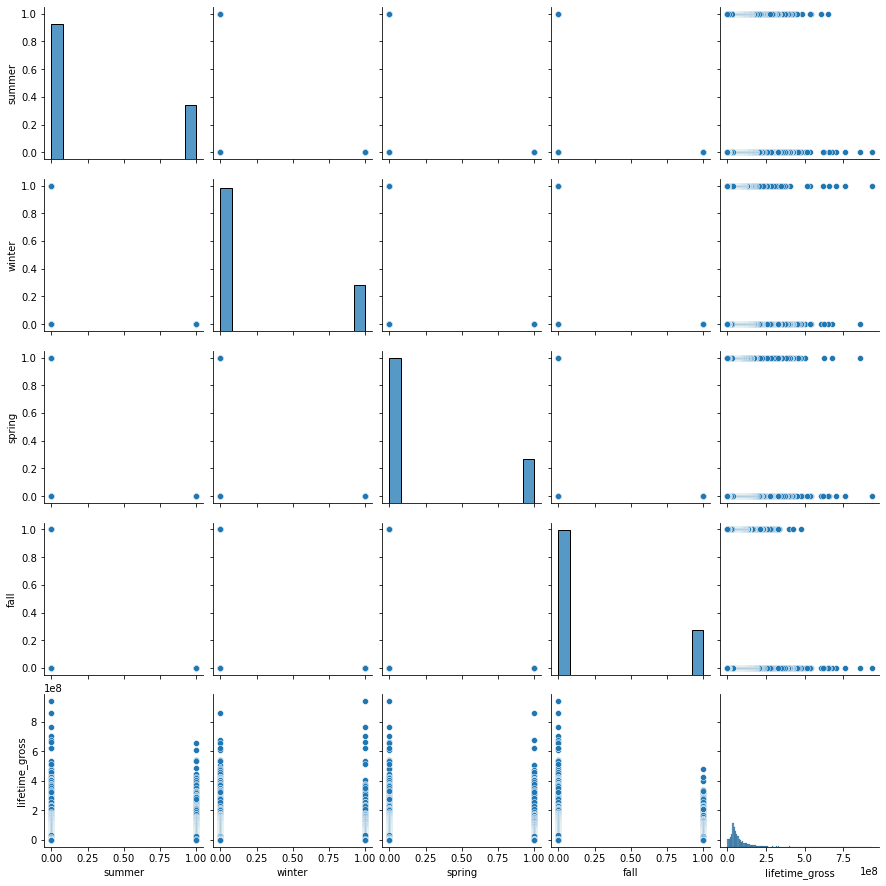

In [37]:
sns.pairplot(all_movies_sea)

<AxesSubplot:>

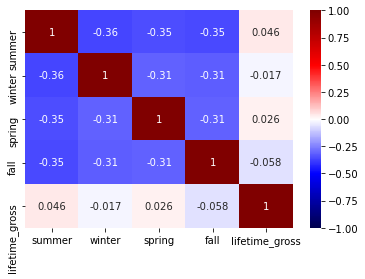

In [38]:
sns.heatmap(all_movies[['summer',
                        'winter',
                        'spring',
                        'fall',
                        'lifetime_gross']].corr(), cmap= 'seismic', annot = True, vmin =- 1, vmax = 1)

# looks like summer might be a feature we want to add to improve our model
# summer is expected since blockbuster movies are released during the summer, hence the term 'summer blockbuster'

In [39]:
X = all_movies[['domestic_opening', 'run_time', 'action', 'summer']]
y = all_movies[['lifetime_gross']]

# get test data, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, train_size = .80, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2515, 4)
(629, 4)
(2515, 1)
(629, 1)


In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[[ 2.65733672e+00  4.76712105e+05 -6.61868779e+06  5.03221449e+06]]
[-25902971.85180144]


In [41]:
# get r squared evaluation metric
print(f'R^2 on training set is {lm.score(X_train, y_train)}')
print(f'R^2 on the testing set is {lm.score(X_test, y_test)}')

R^2 on training set is 0.7341310345195807
R^2 on the testing set is 0.7058116559641445


### Feature Engineering With Distributors

In [42]:
# deal with smaller domestic distributors
all_movies['domestic_distributor'].unique()

array(['Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Twentieth Century Fox', 'Paramount Pictures',
       'Universal Pictures', 'Miramax',
       'Warner Independent Pictures (WIP)', 'Metro-Goldwyn-Mayer (MGM)',
       'DreamWorks Distribution', 'United Artists',
       'Artisan Entertainment', 'TriStar Pictures',
       'The Samuel Goldwyn Company', 'Orion Pictures', 'Picturehouse',
       'Sony Pictures Entertainment (SPE)', 'Destination Films', 'IMAX',
       'Sony Pictures Classics', 'New Line Cinema',
       'Summit Entertainment', 'Columbia Pictures', 'PolyGram',
       'National Geographic Entertainment', 'Neon',
       'The Weinstein Company', 'Jensen Farley Pictures',
       'De Laurentiis Entertainment Group (DEG)', 'THINKFilm',
       'IFC Films', 'Visio Entertainment',
       'First National Film Corporation', 'Shadow Distribution',
       'Cineplex Odeon Films', 'Cowboy Pictures',
       'Atlantic Releasing Corporation', 'Triton Pictures', 'Hemdale',
     

In [43]:
# pick the most popular distributors and nest the rest in 'Others'
distributor_list = ['Warner Bros.',
                    'Walt Disney Studios Motion Pictures',
                    'Universal Pictures',
                    'Twentieth Century Fox',
                    'Paramount Pictures',
                    'Sony Pictures Entertainment (SPE)',
                    'Others']
                    
def distributor(series):
    for movie in series:
        if series not in distributor_list:
            series = 'Others'
        return series
        
all_movies['domestic_distributor'] = all_movies['domestic_distributor'].apply(distributor)

In [44]:
# try feature engineering on distributors
all_movies['domestic_distributor'].value_counts(normalize = True).head(50)

Others                                 0.320611
Warner Bros.                           0.158079
Walt Disney Studios Motion Pictures    0.124682
Universal Pictures                     0.122455
Twentieth Century Fox                  0.109733
Paramount Pictures                     0.093830
Sony Pictures Entertainment (SPE)      0.070611
Name: domestic_distributor, dtype: float64

In [45]:
# create others dummy
def others(series):
    if 'Others' in series:
        return 1
    else:
        return 0
all_movies['others'] = all_movies['domestic_distributor'].apply(others)

# create warner_bros dummy
def warner_bros(series):
    if 'Warner Bros.' in series:
        return 1
    else:
        return 0
all_movies['warnerbros'] = all_movies['domestic_distributor'].apply(warner_bros)

# create disney dummy
def disney(series):
    if 'Walt Disney Studios Motion Pictures' in series:
        return 1
    else:
        return 0
all_movies['disney'] = all_movies['domestic_distributor'].apply(disney)

# create universal dummy
def universal(series):
    if 'Universal Pictures' in series:
        return 1
    else:
        return 0
all_movies['universal'] = all_movies['domestic_distributor'].apply(universal)

# create fox dummy
def fox(series):
    if 'Twentieth Century Fox' in series:
        return 1
    else:
        return 0
all_movies['fox'] = all_movies['domestic_distributor'].apply(fox)

# create paramount dummy
def paramount(series):
    if 'Paramount Pictures' in series:
        return 1
    else:
        return 0
all_movies['paramount'] = all_movies['domestic_distributor'].apply(paramount)

# create sony dummy
def sony(series):
    if 'Sony Pictures Entertainment (SPE)' in series:
        return 1
    else:
        return 0
all_movies['sony'] = all_movies['domestic_distributor'].apply(sony)

In [46]:
all_movies_dist = (all_movies[['others',
                               'warnerbros',
                               'disney',
                               'universal',
                               'fox',
                               'paramount',
                               'sony',
                               'lifetime_gross']])

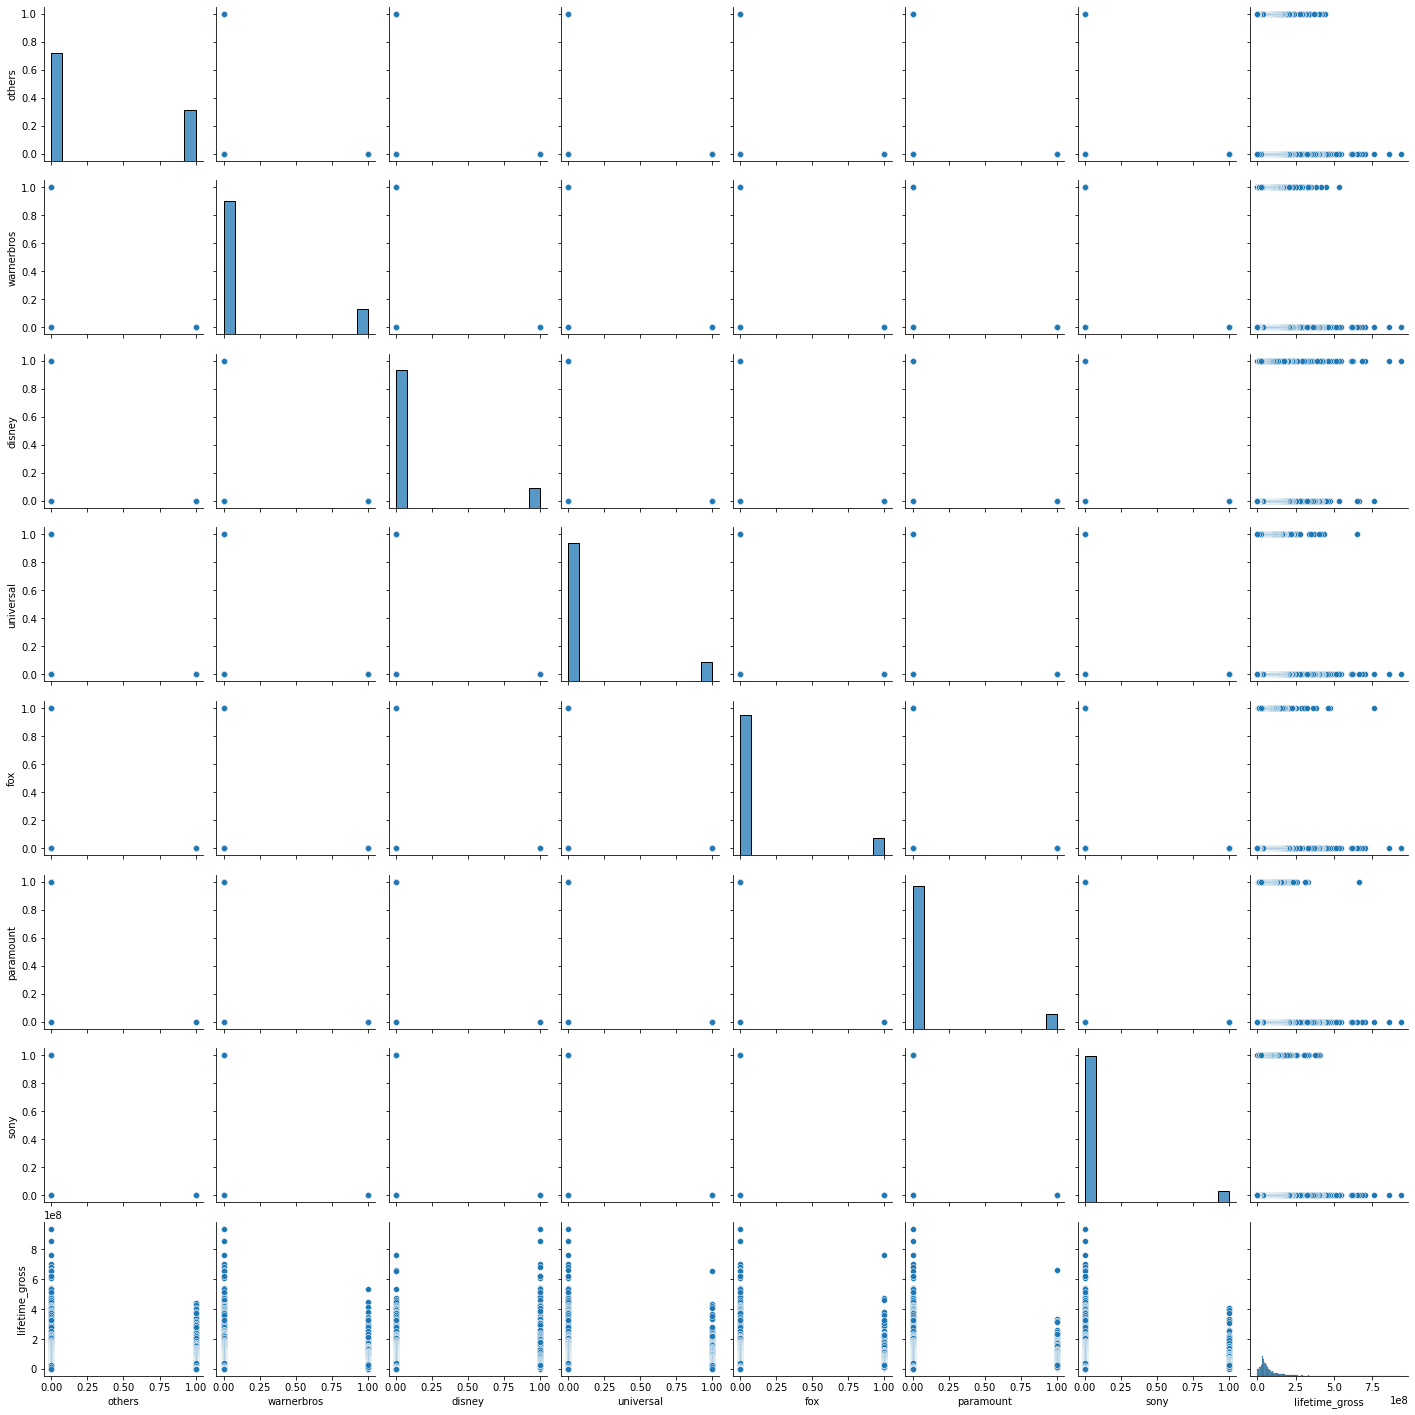

In [47]:
sns.pairplot(all_movies_dist)

<AxesSubplot:>

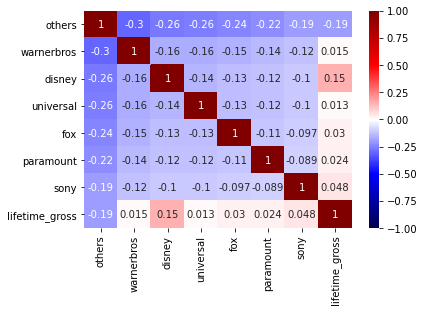

In [48]:
sns.heatmap(all_movies[['others',
                        'warnerbros',
                        'disney',
                        'universal',
                        'fox',
                        'paramount',
                        'sony',
                        'lifetime_gross']].corr(), cmap= 'seismic', annot = True, vmin =- 1, vmax =1)

# seems like disney comes out with movies with high earnings potential

In [49]:
X = all_movies[['domestic_opening', 'run_time', 'action', 'summer', 'disney']]
y = all_movies[['lifetime_gross']]

# get test data, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, train_size = .80, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2515, 5)
(629, 5)
(2515, 1)
(629, 1)


In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[[ 2.62604729e+00  5.01135979e+05 -5.84494305e+06  4.91658858e+06
   1.34942405e+07]]
[-29807046.00038017]


In [51]:
# get r squared evaluation metric
print(f'R^2 on training set is {lm.score(X_train, y_train)}')
print(f'R^2 on the testing set is {lm.score(X_test, y_test)}')

R^2 on training set is 0.7369819125453003
R^2 on the testing set is 0.7097089011321434


### Results

In [52]:
# we test on the original model since that gave us the highest R2
X = all_movies[['domestic_opening', 'run_time', 'action', 'summer', 'disney']]
y = all_movies[['lifetime_gross']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, train_size = .80, random_state = 42)

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[[ 2.62604729e+00  5.01135979e+05 -5.84494305e+06  4.91658858e+06
   1.34942405e+07]]
[-29807046.00038017]


In [53]:
print(f'R^2 on training set is {lm.score(X_train, y_train)}')
print(f'R^2 on the testing set is {lm.score(X_test, y_test)}')

R^2 on training set is 0.7369819125453003
R^2 on the testing set is 0.7097089011321434
